# Homework 1

## Importing libraries and Defining Visualizer

In [1]:
import numpy as np
from numpy import matlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

The code below was taken from: https://github.com/jermwatt/machine_learning_refined
The file can be found in /mlrefined_libraries/math_optimization_library/static_plotter.py

In [4]:
# import standard plotting and animation
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import gridspec
from IPython.display import clear_output
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform

import math
import time
import copy


class Visualizer:
    '''
    Illustrate a run of your preferred optimization algorithm on a one or two-input function.  Run
    the algorithm first, and input the resulting weight history into this wrapper.
    ''' 

    ##### draw picture of function and run for single-input function ####       
    def single_input_plot(self,g,weight_histories,cost_histories,**kwargs):        
        # adjust viewing range
        wmin = -3.1
        wmax = 3.1
        if 'wmin' in kwargs:            
            wmin = kwargs['wmin']
        if 'wmax' in kwargs:
            wmax = kwargs['wmax']
            
        onerun_perplot = False
        if 'onerun_perplot' in kwargs:
            onerun_perplot = kwargs['onerun_perplot']
            
        ### initialize figure
        fig = plt.figure(figsize = (9,4))
        artist = fig
        
        # remove whitespace from figure
        #fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        #fig.subplots_adjust(wspace=0.01,hspace=0.01)

        # create subplot with 2 panels, plot input function in center plot
        gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
        ax1 = plt.subplot(gs[0]); 
        ax2 = plt.subplot(gs[1]); 

        ### plot function in both panels
        w_plot = np.linspace(wmin,wmax,500)
        g_plot = g(w_plot)
        gmin = np.min(g_plot)
        gmax = np.max(g_plot)
        g_range = gmax - gmin
        ggap = g_range*0.1
        gmin -= ggap
        gmax += ggap
        
        # plot function, axes lines
        ax1.plot(w_plot,g_plot,color = 'k',zorder = 2)                           # plot function
        ax1.axhline(y=0, color='k',zorder = 1,linewidth = 0.25)
        ax1.axvline(x=0, color='k',zorder = 1,linewidth = 0.25)
        ax1.set_xlabel(r'$w$',fontsize = 13)
        ax1.set_ylabel(r'$g(w)$',fontsize = 13,rotation = 0,labelpad = 25)            
        ax1.set_xlim(wmin,wmax)
        ax1.set_ylim(gmin,gmax)
        
        ax2.plot(w_plot,g_plot,color = 'k',zorder = 2)                           # plot function
        ax2.axhline(y=0, color='k',zorder = 1,linewidth = 0.25)
        ax2.axvline(x=0, color='k',zorder = 1,linewidth = 0.25)
        ax2.set_xlabel(r'$w$',fontsize = 13)
        ax2.set_ylabel(r'$g(w)$',fontsize = 13,rotation = 0,labelpad = 25)   
        ax2.set_xlim(wmin,wmax)
        ax2.set_ylim(gmin,gmax)        
       
        #### loop over histories and plot each
        for j in range(len(weight_histories)):
            w_hist = weight_histories[j]
            c_hist = cost_histories[j]
            
            # colors for points --> green as the algorithm begins, yellow as it converges, red at final point
            s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
            s.shape = (len(s),1)
            t = np.ones(len(w_hist[round(len(w_hist)/2):]))
            t.shape = (len(t),1)
            s = np.vstack((s,t))
            self.colorspec = []
            self.colorspec = np.concatenate((s,np.flipud(s)),1)
            self.colorspec = np.concatenate((self.colorspec,np.zeros((len(s),1))),1)
            
            ### plot all history points
            ax = ax2
            if onerun_perplot == True:
                if j == 0:
                    ax = ax1
                if j == 1:
                    ax = ax2
            for k in range(len(w_hist)):
                # pick out current weight and function value from history, then plot
                w_val = w_hist[k]
                g_val = c_hist[k]
                ax.scatter(w_val,g_val,s = 90,c = self.colorspec[k],edgecolor = 'k',linewidth = 0.5*((1/(float(k) + 1)))**(0.4),zorder = 3,marker = 'X')            # evaluation on function
                ax.scatter(w_val,0,s = 90,facecolor = self.colorspec[k],edgecolor = 'k',linewidth = 0.5*((1/(float(k) + 1)))**(0.4), zorder = 3)

    ##### draw picture of function and run for two-input function ####       
    def two_input_surface_contour_plot(self,g,w_hist,**kwargs):
        ### input arguments ###        
        num_contours = 10
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']
           
        view = [20,20]
        if 'view' in kwargs:
            view = kwargs['view']
            
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (11,5))
        self.edgecolor = 'k'

        # create subplot with 3 panels, plot input function in center plot
        # this seems to be the best option for whitespace management when using
        # both a surface and contour plot in the same figure
        gs = gridspec.GridSpec(1, 3, width_ratios=[1,5,10]) 
        ax1 = plt.subplot(gs[1],projection='3d'); 
        ax2 = plt.subplot(gs[2],aspect='equal'); 
        
        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        # plot 3d surface and path in left panel
        self.draw_surface(g,ax1,**kwargs)
        self.show_inputspace_path(w_hist,ax1)
        ax1.view_init(view[0],view[1])
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax2,**kwargs)  # draw contour plot
        self.draw_weight_path(ax2,w_hist)              # draw path on contour plot

        # plot
        plt.show()
 


    ##### draw picture of function and run for two-input function ####       
    def two_input_original_contour_plot(self,g,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,4.5))

        # create figure with single plot for contour
        gs = gridspec.GridSpec(1, 1) 
        ax1 = plt.subplot(gs[0],aspect='equal'); 

        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax1,**kwargs)  # draw contour plot

        # plot
        plt.show()
        
        
    ##### draw picture of function and run for two-input function ####       
    def two_input_contour_plot(self,g,w_hist,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,4.5))
        
        # show original contour function as well?
        show_original = True
        if 'show_original' in kwargs:
            show_original = kwargs['show_original']

        # create figure with single plot for contour
        gs = gridspec.GridSpec(1, 2) 
        ax1 = plt.subplot(gs[0],aspect='equal'); 
        ax2 = plt.subplot(gs[1],aspect='equal'); 
        
        if show_original == False:
            gs = gridspec.GridSpec(1, 1) 
            ax2 = plt.subplot(gs[0],aspect='equal'); 

        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax2,**kwargs)  # draw contour plot
        self.edgecolor = 'k'
        self.draw_weight_path(ax2,w_hist,**kwargs)        # draw path on contour plot
        
        if show_original == True:
            self.contour_plot_setup(g,ax1,**kwargs)  # draw contour plot

        # plot
        plt.show()
 
    ##### draw picture of function and run for two-input function ####       
    def two_input_contour_horiz_plots(self,g,histories,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,4.5))

        # create figure with single plot for contour
        num_plots = len(histories)
        axs = gridspec.GridSpec(1, num_plots) 
        
        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        # define edgecolors 
        edgecolors = ['k','magenta','aqua','blueviolet','chocolate']
        
        # loop over histories and plot
        for j in range(num_plots):
            # get next weight history
            w_hist = histories[j]
            
            # create subplot
            ax = plt.subplot(axs[j],aspect='equal'); 

            ### make contour right plot - as well as horizontal and vertical axes ###
            self.contour_plot_setup(g,ax,**kwargs)           # draw contour plot
            self.edgecolor = edgecolors[j]
            self.draw_weight_path(ax,w_hist,**kwargs)        # draw path on contour plot

        # plot
        plt.show()

    ##### draw picture of function and run for two-input function ####       
    def two_input_contour_vert_plots(self,gs,histories,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,7))

        # create figure with single plot for contour
        num_plots = len(histories)
        axs = gridspec.GridSpec(num_plots,1) 
        
        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        # define edgecolors 
        edgecolors = ['k','k','k','k','k']
        
        # loop over histories and plot
        for j in range(num_plots):
            # get next weight history
            w_hist = histories[j]
            g = gs[j]
            
            # create subplot
            ax = plt.subplot(axs[j],aspect='equal'); 

            ### make contour right plot - as well as horizontal and vertical axes ###
            self.contour_plot_setup(g,ax,**kwargs)           # draw contour plot
            self.edgecolor = edgecolors[j]
            self.draw_weight_path(ax,w_hist,**kwargs)        # draw path on contour plot

        # plot
        plt.show()
        
    ##### draw picture of function and run for two-input function ####       
    def compare_runs_contour_plots(self,g,weight_histories,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,4.5))
        self.edgecolor = 'k'
         
        # create figure with single plot for contour
        gs = gridspec.GridSpec(1, 2) 
        ax1 = plt.subplot(gs[0],aspect='equal'); 
        ax2 = plt.subplot(gs[1],aspect='equal'); 

        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax1,**kwargs)  # draw contour plot
        w_hist = weight_histories[0]
        self.draw_weight_path(ax1,w_hist)        # draw path on contour plot
        
        self.contour_plot_setup(g,ax2,**kwargs)  # draw contour plot
        w_hist = weight_histories[1]
        self.draw_weight_path(ax2,w_hist)        # draw path on contour plot
        
        # plot
        plt.show()   
        
        
    # compare cost histories from multiple runs
    def plot_cost_histories(self,histories,start,**kwargs):
        # plotting colors
        colors = ['k','magenta','aqua','blueviolet','chocolate']
        
        # initialize figure
        fig = plt.figure(figsize = (10,3))

        # create subplot with 1 panel
        gs = gridspec.GridSpec(1, 1) 
        ax = plt.subplot(gs[0]); 
        
        # any labels to add?        
        labels = [' ',' ']
        if 'labels' in kwargs:
            labels = kwargs['labels']
            
        # plot points on cost function plot too?
        points = False
        if 'points' in kwargs:
            points = kwargs['points']

        # run through input histories, plotting each beginning at 'start' iteration
        for c in range(len(histories)):
            history = histories[c]
            label = 0
            if c == 0:
                label = labels[0]
            else:
                label = labels[1]
                
            # check if a label exists, if so add it to the plot
            if np.size(label) == 0:
                ax.plot(np.arange(start,len(history),1),history[start:],linewidth = 3*(0.8)**(c),color = colors[c]) 
            else:               
                ax.plot(np.arange(start,len(history),1),history[start:],linewidth = 3*(0.8)**(c),color = colors[c],label = label) 
                
            # check if points should be plotted for visualization purposes
            if points == True:
                ax.scatter(np.arange(start,len(history),1),history[start:],s = 90,color = colors[c],edgecolor = 'w',linewidth = 2,zorder = 3) 


        # clean up panel
        xlabel = 'step $k$'
        if 'xlabel' in kwargs:
            xlabel = kwargs['xlabel']
        ylabel = r'$g\left(\mathbf{w}^k\right)$'
        if 'ylabel' in kwargs:
            ylabel = kwargs['ylabel']
        ax.set_xlabel(xlabel,fontsize = 14)
        ax.set_ylabel(ylabel,fontsize = 14,rotation = 0,labelpad = 25)
        if np.size(label) > 0:
            anchor = (1,1)
            if 'anchor' in kwargs:
                anchor = kwargs['anchor']
            plt.legend(loc='upper right', bbox_to_anchor=anchor)
            #leg = ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

        ax.set_xlim([start - 0.5,len(history) - 0.5])
        
       # fig.tight_layout()
        plt.show()

    # get directions good
    def plot_grad_directions(self,histories,**kwargs):
        # loop over histories and plot grad directions
        num_histories = len(histories)
       
        # construct figure
        fig = plt.figure(figsize = (10,5))

        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
            
        # create figure with single plot for contour
        axs = gridspec.GridSpec(1,num_histories) 
        
        for j in range(num_histories):
            # create directions out of weight history
            w_hist = histories[j]
            num_weights = len(w_hist)
            directions = []
            for i in range(num_weights - 1):
                w_old = w_hist[i]
                w_new = w_hist[i+1]

                # form direction 
                direction = w_new - w_old

                # normalize
                direction /= np.sqrt(np.sum([r**2 for r in direction]))

                # store 
                directions.append(direction)

            # plot directions as arrows
            ax = plt.subplot(axs[j],aspect='equal'); 
            self.draw_grads(ax,directions,**kwargs)        # draw path on contour plot

            # set viewlimits
            ax.set_xlim([-1.25,1.25])
            ax.set_ylim([-1.25,1.25])

        # plot
        plt.show()

    # get directions good
    def plot_grad_directions_v2(self,history,**kwargs):
        # loop over histories and plot grad directions
        num_grads = np.minimum(len(history),9)
       
        # construct figure
        fig = plt.figure(figsize = (6,6))

        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
            
        # create figure with single plot for contour
        axs = gridspec.GridSpec(3,3) 
        
        # create directions out of weight history
        directions = []
        for i in range(len(history) - 1):
            w_old = history[i]
            w_new = history[i+1]

            # form direction 
            direction = w_new - w_old

            # normalize
            direction /= np.sqrt(np.sum([r**2 for r in direction]))

            # store 
            directions.append(direction)
        
        # plot directions as arrows
        self.colorspec = self.make_colorspec(directions[:num_grads+1])
        for j in range(num_grads):
            ax = plt.subplot(axs[j],aspect='equal'); 
            self.draw_grads_v2(ax,directions[:j+1],**kwargs)        # draw path on contour plot

            # set viewlimits
            ax.set_xlim([-1.25,1.25])
            ax.set_ylim([-1.25,1.25])
            
            # set title
            title = 'step ' + str(j+1) + ' direction'
            ax.set_title(title)

        # plot
        plt.show()
        
    ########################################################################################
    #### utility functions - for setting up / making contour plots, 3d surface plots, etc., ####
    # show contour plot of input function
    def contour_plot_setup(self,g,ax,**kwargs):
        xmin = -3.1
        xmax = 3.1
        ymin = -3.1
        ymax = 3.1
        if 'xmin' in kwargs:            
            xmin = kwargs['xmin']
        if 'xmax' in kwargs:
            xmax = kwargs['xmax']
        if 'ymin' in kwargs:            
            ymin = kwargs['ymin']
        if 'ymax' in kwargs:
            ymax = kwargs['ymax']      
        num_contours = 20
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']   
            
        # choose viewing range using weight history?
        if 'view_by_weights' in kwargs:
            view_by_weights = True
            weight_history = kwargs['weight_history']
            if view_by_weights == True:
                xmin = min([v[0] for v in weight_history])[0]
                xmax = max([v[0] for v in weight_history])[0]
                xgap = (xmax - xmin)*0.25
                xmin -= xgap
                xmax += xgap

                ymin = min([v[1] for v in weight_history])[0]
                ymax = max([v[1] for v in weight_history])[0]
                ygap = (ymax - ymin)*0.25
                ymin -= ygap
                ymax += ygap
 
        ### plot function as contours ###
        self.draw_contour_plot(g,ax,num_contours,xmin,xmax,ymin,ymax)
        
        ### cleanup panel ###
        ax.set_xlabel('$w_0$',fontsize = 14)
        ax.set_ylabel('$w_1$',fontsize = 14,labelpad = 15,rotation = 0)
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        # ax.set_xticks(np.arange(round(xmin),round(xmax)+1))
        # ax.set_yticks(np.arange(round(ymin),round(ymax)+1))
        
        # set viewing limits
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)

    ### function for creating contour plot
    def draw_contour_plot(self,g,ax,num_contours,xmin,xmax,ymin,ymax):
        #### define input space for function and evaluate ####
        w1 = np.linspace(xmin,xmax,400)
        w2 = np.linspace(ymin,ymax,400)
        w1_vals, w2_vals = np.meshgrid(w1,w2)
        w1_vals.shape = (len(w1)**2,1)
        w2_vals.shape = (len(w2)**2,1)
        h = np.concatenate((w1_vals,w2_vals),axis=1)
        func_vals = np.asarray([ g(np.reshape(s,(2,1))) for s in h])

        w1_vals.shape = (len(w1),len(w1))
        w2_vals.shape = (len(w2),len(w2))
        func_vals.shape = (len(w1),len(w2)) 
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        # set level ridges
        levelmin = min(func_vals.flatten())
        levelmax = max(func_vals.flatten())
        cutoff = 1
        cutoff = (levelmax - levelmin)*cutoff
        numper = 4
        levels1 = np.linspace(cutoff,levelmax,numper)
        num_contours -= numper

        # produce generic contours
        levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
        levels = np.unique(np.append(levels1,levels2))
        num_contours -= numper
        while num_contours > 0:
            cutoff = levels[1]
            levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
            levels = np.unique(np.append(levels2,levels))
            num_contours -= numper
   
        # plot the contours
        ax.contour(w1_vals, w2_vals, func_vals,levels = levels[1:],colors = 'k')
        ax.contourf(w1_vals, w2_vals, func_vals,levels = levels,cmap = 'Blues')

        ###### clean up plot ######
        ax.set_xlabel('$w_0$',fontsize = 12)
        ax.set_ylabel('$w_1$',fontsize = 12,rotation = 0)
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        
        
    ### makes color spectrum for plotted run points - from green (start) to red (stop)
    def make_colorspec(self,w_hist):
        # make color range for path
        s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
        s.shape = (len(s),1)
        t = np.ones(len(w_hist[round(len(w_hist)/2):]))
        t.shape = (len(t),1)
        s = np.vstack((s,t))
        colorspec = []
        colorspec = np.concatenate((s,np.flipud(s)),1)
        colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)
        return colorspec


    ### function for drawing weight history path
    def draw_grads(self,ax,directions,**kwargs):
        # make colors for plot
        colorspec = self.make_colorspec(directions)

        arrows = True
        if 'arrows' in kwargs:
            arrows = kwargs['arrows']
            
        # plot axes
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        
        ### plot function decrease plot in right panel
        for j in range(len(directions)):  
            # get current direction
            direction = directions[j]
            
            # draw arrows connecting pairwise points
            head_length = 0.1
            head_width = 0.1
            ax.arrow(0,0,direction[0],direction[1], head_width=head_width, head_length=head_length, fc='k', ec='k',linewidth=1,zorder = 2,length_includes_head=True)
            ax.arrow(0,0,direction[0],direction[1], head_width=0.1, head_length=head_length, fc=colorspec[j], ec=colorspec[j],linewidth=0.25,zorder = 2,length_includes_head=True)

    ### function for drawing weight history path
    def draw_grads_v2(self,ax,directions,**kwargs):
        arrows = True
        if 'arrows' in kwargs:
            arrows = kwargs['arrows']
            
        # plot axes
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        
        ### plot function decrease plot in right panel
        head_length = 0.1
        head_width = 0.1
        alpha = 0.1
        for j in range(len(directions)-1):  
            # get current direction
            direction = directions[j]
            
            # draw arrows connecting pairwise points
            ax.arrow(0,0,direction[0],direction[1], head_width=head_width, head_length=head_length, fc='k', ec='k',linewidth=3.5,zorder = 2,length_includes_head=True,alpha = alpha)
            ax.arrow(0,0,direction[0],direction[1], head_width=0.1, head_length=head_length, fc=self.colorspec[j], ec=self.colorspec[j],linewidth=3,zorder = 2,length_includes_head=True,alpha = alpha)
            
        # plot most recent direction
        direction = directions[-1]
        num_dirs = len(directions)
  
        # draw arrows connecting pairwise points
        ax.arrow(0,0,direction[0],direction[1], head_width=head_width, head_length=head_length, fc='k', ec='k',linewidth=4,zorder = 2,length_includes_head=True)
        ax.arrow(0,0,direction[0],direction[1], head_width=0.1, head_length=head_length, fc=self.colorspec[num_dirs], ec=self.colorspec[num_dirs],linewidth=3,zorder = 2,length_includes_head=True)            
            
    ### function for drawing weight history path
    def draw_weight_path(self,ax,w_hist,**kwargs):
        # make colors for plot
        colorspec = self.make_colorspec(w_hist)
        
        arrows = True
        if 'arrows' in kwargs:
            arrows = kwargs['arrows']

        ### plot function decrease plot in right panel
        for j in range(len(w_hist)):  
            w_val = w_hist[j]

            # plot each weight set as a point
            ax.scatter(w_val[0],w_val[1],s = 80,c = colorspec[j],edgecolor = self.edgecolor,linewidth = 2*math.sqrt((1/(float(j) + 1))),zorder = 3)

            # plot connector between points for visualization purposes
            if j > 0:
                pt1 = w_hist[j-1]
                pt2 = w_hist[j]
                
                # produce scalar for arrow head length
                pt_length = np.linalg.norm(pt1 - pt2)
                head_length = 0.1
                alpha = (head_length - 0.35)/pt_length + 1
                
                # if points are different draw error
                if np.linalg.norm(pt1 - pt2) > head_length and arrows == True:
                    if np.ndim(pt1) > 1:
                        pt1 = pt1.flatten()
                        pt2 = pt2.flatten()
                        
                        
                    # draw color connectors for visualization
                    w_old = pt1
                    w_new = pt2
                    ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = colorspec[j],linewidth = 2,alpha = 1,zorder = 2)      # plot approx
                    ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = 'k',linewidth = 3,alpha = 1,zorder = 1)      # plot approx
                
                
                    # draw arrows connecting pairwise points
                    #ax.arrow(pt1[0],pt1[1],(pt2[0] - pt1[0])*alpha,(pt2[1] - pt1[1])*alpha, head_width=0.1, head_length=head_length, fc='k', ec='k',linewidth=4,zorder = 2,length_includes_head=True)
                    #ax.arrow(pt1[0],pt1[1],(pt2[0] - pt1[0])*alpha,(pt2[1] - pt1[1])*alpha, head_width=0.1, head_length=head_length, fc='w', ec='w',linewidth=0.25,zorder = 2,length_includes_head=True)
        
    ### draw surface plot
    def draw_surface(self,g,ax,**kwargs):
        xmin = -3.1
        xmax = 3.1
        ymin = -3.1
        ymax = 3.1
        if 'xmin' in kwargs:            
            xmin = kwargs['xmin']
        if 'xmax' in kwargs:
            xmax = kwargs['xmax']
        if 'ymin' in kwargs:            
            ymin = kwargs['ymin']
        if 'ymax' in kwargs:
            ymax = kwargs['ymax']   
            
        #### define input space for function and evaluate ####
        w1 = np.linspace(xmin,xmax,200)
        w2 = np.linspace(ymin,ymax,200)
        w1_vals, w2_vals = np.meshgrid(w1,w2)
        w1_vals.shape = (len(w1)**2,1)
        w2_vals.shape = (len(w2)**2,1)
        h = np.concatenate((w1_vals,w2_vals),axis=1)
        func_vals = np.asarray([g(np.reshape(s,(2,1))) for s in h])

        ### plot function as surface ### 
        w1_vals.shape = (len(w1),len(w2))
        w2_vals.shape = (len(w1),len(w2))
        func_vals.shape = (len(w1),len(w2))
        ax.plot_surface(w1_vals, w2_vals, func_vals, alpha = 0.1,color = 'w',rstride=25, cstride=25,linewidth=1,edgecolor = 'k',zorder = 2)

        # plot z=0 plane 
        ax.plot_surface(w1_vals, w2_vals, func_vals*0, alpha = 0.1,color = 'w',zorder = 1,rstride=25, cstride=25,linewidth=0.3,edgecolor = 'k') 
                
        # clean up axis
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False

        ax.xaxis.pane.set_edgecolor('white')
        ax.yaxis.pane.set_edgecolor('white')
        ax.zaxis.pane.set_edgecolor('white')

        ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        
        ax.set_xlabel('$w_0$',fontsize = 14)
        ax.set_ylabel('$w_1$',fontsize = 14,rotation = 0)
        ax.set_title('$g(w_0,w_1)$',fontsize = 14)
        

    ### plot points and connectors in input space in 3d plot        
    def show_inputspace_path(self,w_hist,ax):
        # make colors for plot
        colorspec = self.make_colorspec(w_hist)
        
        for k in range(len(w_hist)):
            pt1 = w_hist[k]
            ax.scatter(pt1[0],pt1[1],0,s = 60,c = colorspec[k],edgecolor = 'k',linewidth = 0.5*math.sqrt((1/(float(k) + 1))),zorder = 3)
            if k < len(w_hist)-1:
                pt2 = w_hist[k+1]
                if np.linalg.norm(pt1 - pt2) > 10**(-3):
                    # draw arrow in left plot
                    a = Arrow3D([pt1[0],pt2[0]], [pt1[1],pt2[1]], [0, 0], mutation_scale=10, lw=2, arrowstyle="-|>", color="k")
                    ax.add_artist(a)
        
#### custom 3d arrow and annotator functions ###    
# nice arrow maker from https://stackoverflow.com/questions/11140163/python-matplotlib-plotting-a-3d-cube-a-sphere-and-a-vector
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [2]:
# random search function
def random_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    w_history = []         # container for w history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    vector_dim=w.shape[0] #Number of dimensions for function
    best_w=w #Initialize the best point in space as the current point
    w_history.append(best_w) 
    cost_history.append(g(best_w))
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        directions = np.random.randn(num_samples,vector_dim) #Generate P different directions
        directions=directions/matlib.repmat(np.sqrt(np.sum(directions**2,axis=1)),vector_dim,1).T #Normalize directions into unit vector
        w_candidates=alpha*directions+matlib.repmat(best_w,num_samples,1) #Create P new points by travelling in direction from current point in space
        
        top_w = w_candidates[np.argmin(np.array([g(i) for i in w_candidates])),:] #Assess top candidates for points
        if(g(top_w)<g(best_w)): #If best candidate is lower than current point, change
            best_w=top_w
        #Add points and cost to w_history and cost_history
        w_history.append(best_w) 
        cost_history.append(g(best_w))
    return w_history,cost_history
        

In [3]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR') #Removing warnings from matplotlib library

## Exercise 1.2

In [39]:
g= lambda w: np.dot(w.T,w) + 2 #Defining function
alpha_choice = 1; w = np.array([3,4]); num_samples = 1000; max_its = 5; #Defining parameters
w_history,cost_history=random_search(g,alpha_choice,max_its,w,num_samples) #Random search of function

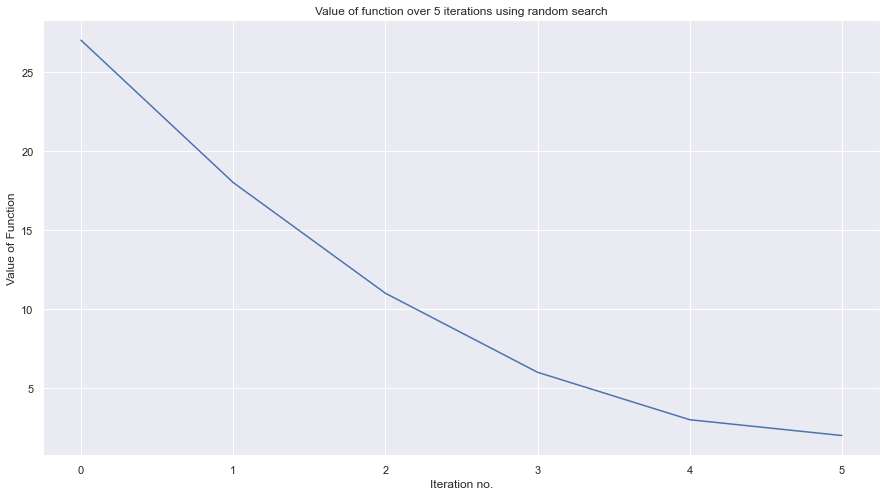

In [40]:
sns.set_theme()
sns.set(rc = {'figure.figsize':(15,8)}) #Seaborn settings for plotting
p=sns.lineplot(y=cost_history,x=[i for i in range(max_its+1)])
_=p.set(title="Value of function over 5 iterations using random search",ylabel="Value of Function",xlabel="Iteration no.",xticks=range(max_its+1))

## Exercise 1.3

In [42]:
alpha_choice = 0.3; w = np.array([3,4]); num_samples = 1000; max_its = 5;
w_history,cost_history=random_search(g,alpha_choice,max_its,w,num_samples)

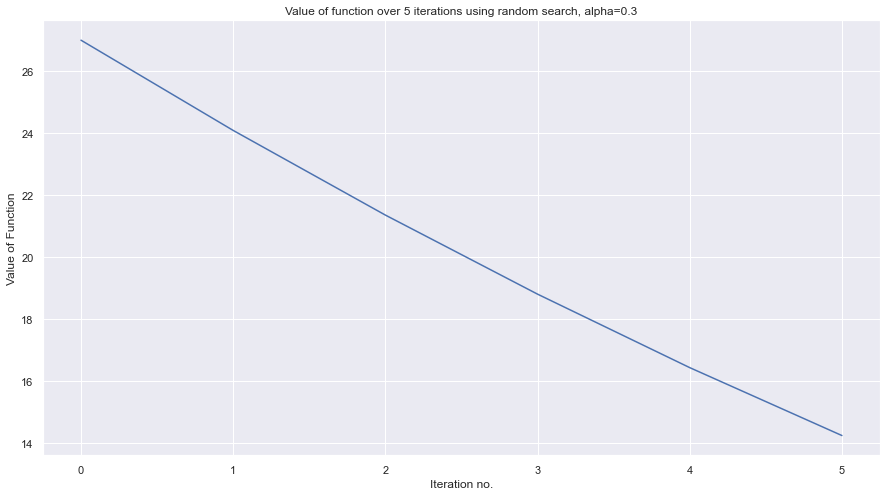

In [43]:

p=sns.lineplot(y=cost_history,x=[i for i in range(max_its+1)])
_=p.set(title="Value of function over 5 iterations using random search, alpha=0.3",ylabel="Value of Function",xlabel="Iteration no.",xticks=range(max_its+1))

Setting alpha as 1 is better than setting alpha as 0.3, as it reaches a lower minimum for the function and in fewer iterations

## Exercise 1.4

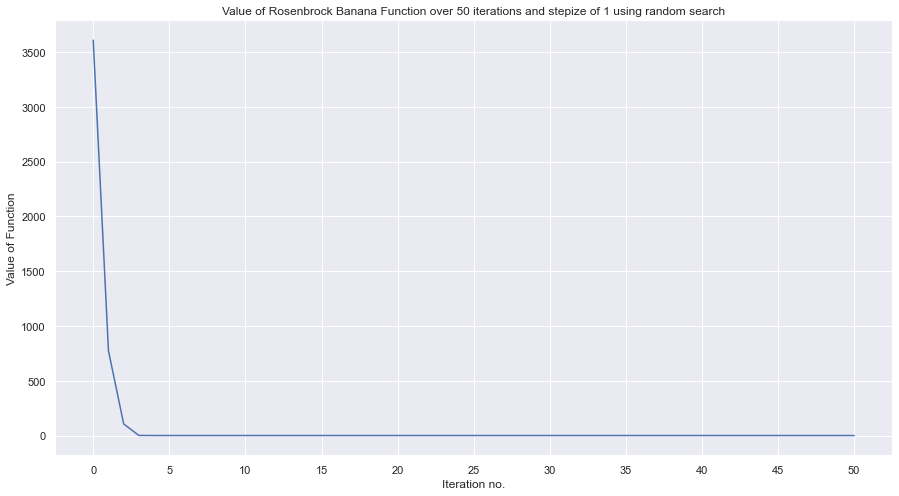

In [44]:
#1.4
g = lambda w: 100*(w[1] - (w[0]**2))**2 + (w[0]- 1)**2
num_samples=1000;max_its= 50; w=np.array([-2,-2]);alpha_choice=1;
w_history,cost_history=random_search(g,alpha_choice,max_its,w,num_samples)
constant_cost_history=cost_history
p=sns.lineplot(y=cost_history,x=[i for i in range(max_its+1)])
_=p.set(title="Value of Rosenbrock Banana Function over 50 iterations and stepize of 1 using random search",
        ylabel="Value of Function",xlabel="Iteration no.",xticks=range(0,max_its+1,5))

<ipython-input-4-4efd3b430233>:642: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (head_length - 0.35)/pt_length + 1


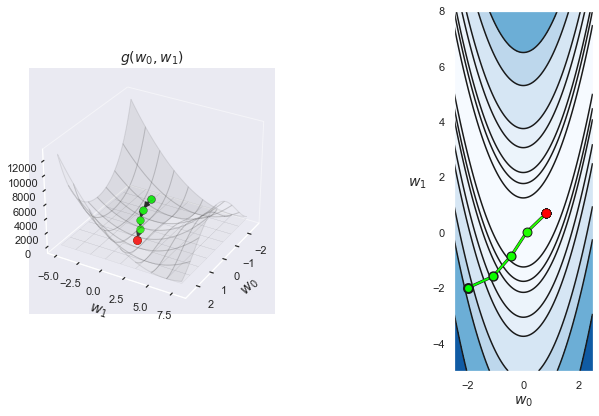

In [45]:
static_plotter=Visualizer();
static_plotter.two_input_surface_contour_plot(g,w_history,view=[30,30],xmin=-2.5,xmax=2.5,ymin=-5,ymax=8)

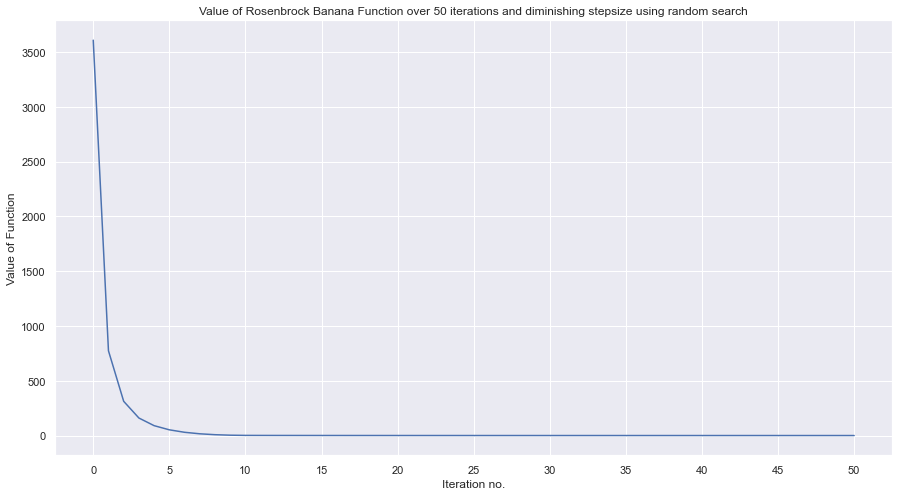

In [46]:
alpha_choice='diminishing';
w_history,cost_history=random_search(g,alpha_choice,max_its,w,num_samples)
diminishing_cost_history=cost_history
p=sns.lineplot(y=cost_history,x=[i for i in range(max_its+1)])
_=p.set(title="Value of Rosenbrock Banana Function over 50 iterations and diminishing stepsize using random search",
        ylabel="Value of Function",xlabel="Iteration no.",xticks=range(0,max_its+1,5))

<ipython-input-4-4efd3b430233>:642: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (head_length - 0.35)/pt_length + 1


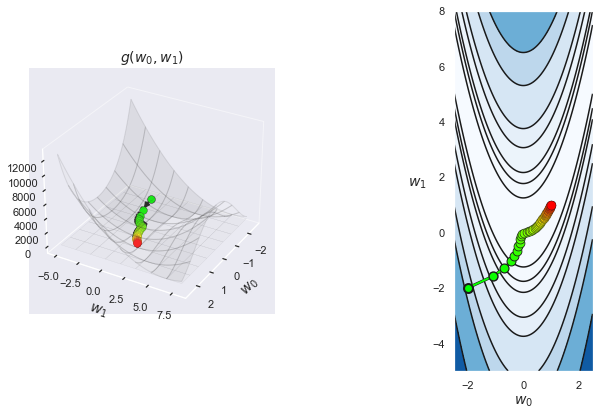

In [47]:
static_plotter=Visualizer();
static_plotter.two_input_surface_contour_plot(g,w_history,view=[30,30],xmin=-2.5,xmax=2.5,ymin=-5,ymax=8)

In [48]:
constant_cost_history[-1]

0.02696957770701361

In [49]:
diminishing_cost_history[-1]

1.4745042634966933e-05

Though the diminishing stepsize did not decrease as fast as the constant stepsize in the first 10 iterations, it was able to converge to a lower final function value when compared to the constant stepsize.

## Exercise 1.5

<ipython-input-4-4efd3b430233>:642: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (head_length - 0.35)/pt_length + 1


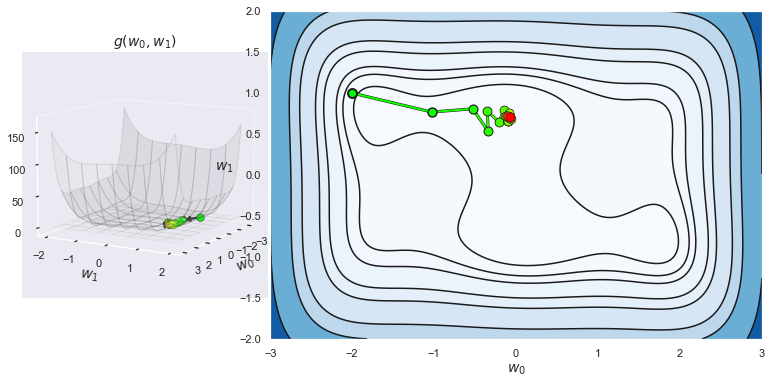

In [158]:
g = lambda w: (4-2.1*w[0]**2+(w[0]**4)/3)*w[0]**2 + w[0]*w[1]+(-4+4*w[1]**2)*w[1]**2

w = np.array([-2,1])
alpha_choice='diminishing'
num_samples=10
w_history,cost_history=random_search(g,alpha_choice,max_its,w,num_samples)
static_plotter=Visualizer();
static_plotter.two_input_surface_contour_plot(g,w_history,view=[10,30],xmin=-3,xmax=3,ymin=-2,ymax=2)

In [159]:
w_history[-1]

array([-0.07767658,  0.70911791])

The function converges to the point (-0.0777, 0.7091), and is able to converge relatively close the the global minima of (−0.0898,0.7126). However this could change depending on whether I use a different alpha or max number of iterations.

## Exercise 2

Text(0.04, 0.5, 'Proportion of possible directions selected that are descending')

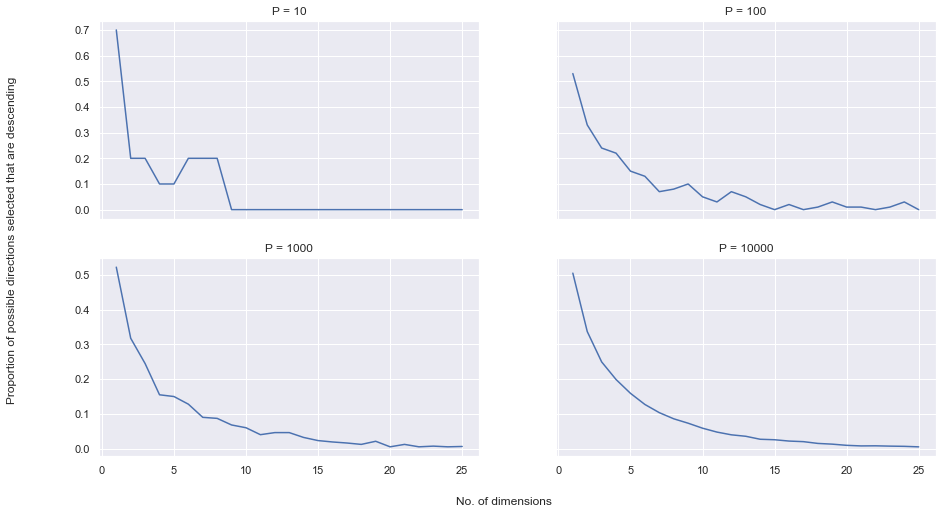

In [57]:
##Exercise 2
g= lambda w: np.dot(w.T,w) + 2
# random search function
def num_of_descending(g,P,N):
    # run random search
    w = np.zeros(N)
    w[0]=1
    directions = np.random.randn(P,N) #Generate P different directions
    directions=directions/matlib.repmat(np.sqrt(np.sum(directions**2,axis=1)),N,1).T #Normalize directions into unit vector
    w_candidates=directions+matlib.repmat(w,P,1)
    num_descending=np.sum(np.array([g(i)for i in w_candidates])<g(w))
    return num_descending
Ns= [i for i in range(1,26)]
Ps=[10,100,1000,10000]
fig,ax=plt.subplots(2,2,sharex='col',sharey='row')
for i,P in enumerate(Ps):
    num_descendings=[]
    for N in Ns:
        num_descendings.append(num_of_descending(g,P,N)/P)
    ax[i//2,i%2].plot(Ns,num_descendings)
    ax[i//2,i%2].set_title(('P = '+str(P)))
fig.text(0.5, 0.04, 'No. of dimensions', ha='center')
fig.text(0.04, 0.5, 'Proportion of possible directions selected that are descending', va='center', rotation='vertical')

For all sample sizes, as the number of possible dimensions of our vector increases, the probability of selecting a direction that is descending decreases towards 0. As we increase the number of dimensions, random searching for a function minimum becomes increasingly inefficient as the probability of selecting a descending vector decreases. Although increasing the sample size might give us more descending vectors, it also increases the overall runtime of the algorithm. Because of this, random sampling is an inefficient method of optimization for high dimensional functions.

## Exercise 3

## 3.1

In [119]:
# random search function
def coordinate_descent(g,alpha_choice,max_its,w,num_samples):
    # run random search
    w_history = []         # container for w history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    vector_dim=w.shape[0] #Number of dimensions for function
    best_w=w #Initialize the best point in space as the current point
    w_history.append(best_w) 
    cost_history.append(g(best_w))
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        directions = np.identity(vector_dim) #Calculate all possible directions (both positive and negative)
        directions_shuffled = np.random.permutation(directions) #Randomly shuffle possible vectors
        for i in directions_shuffled: #Loop through shuffled directions and if function is lower, replace set the new current point to the 
            if(g(best_w+alpha*i)<g(best_w)):
                best_w=best_w+alpha*i
                break
            elif(g(best_w-alpha*i)<g(best_w)):
                best_w=best_w-alpha*i
                break
        
        w_history.append(best_w) 
        cost_history.append(g(best_w))
    return w_history,cost_history

# random search function
def coordinate_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    w_history = []         # container for w history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    vector_dim=w.shape[0] #Number of dimensions for function
    best_w=w #Initialize the best point in space as the current point
    w_history.append(best_w) 
    cost_history.append(g(best_w))
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        #Generate all possible directions and select for the one with the lowest cost functions    
        directions = np.concatenate([np.zeros(vector_dim).reshape(1,-1),np.identity(vector_dim),-np.identity(vector_dim)],axis=0) 
        new_vectors = alpha*directions+best_w
        best_w = new_vectors[np.argmin([g(k) for k in new_vectors])]
        
        w_history.append(best_w) 
        cost_history.append(g(best_w))
    return w_history,cost_history
                

## 3.2

<ipython-input-4-4efd3b430233>:642: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (head_length - 0.35)/pt_length + 1


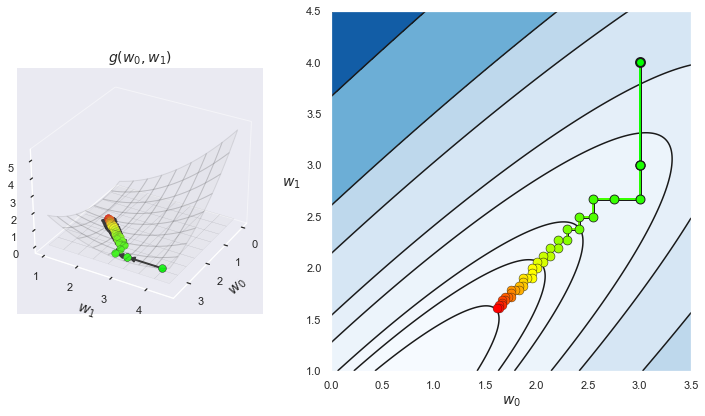

In [133]:
g = lambda w: 0.26*(w[0]**2 + w[1]**2)-0.48*w[0]*w[1]
w = np.array([3,4]);
num_samples=40;
max_its=40;
search_w_history,search_cost_history=coordinate_search(g,'diminishing',max_its,w,num_samples)
static_plotter=Visualizer();
static_plotter.two_input_surface_contour_plot(g,search_w_history,view=[30,30],xmin=0,xmax=3.5,ymin=1,ymax=4.5)

<ipython-input-4-4efd3b430233>:642: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (head_length - 0.35)/pt_length + 1


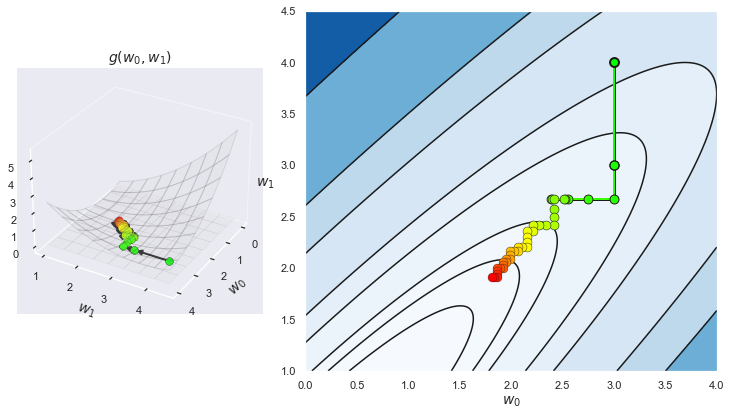

In [139]:
descent_w_history,descent_cost_history=coordinate_descent(g,'diminishing',max_its,w,num_samples)
static_plotter=Visualizer();
static_plotter.two_input_surface_contour_plot(g,descent_w_history,view=[30,30],xmin=0,xmax=4,ymin=1,ymax=4.5)

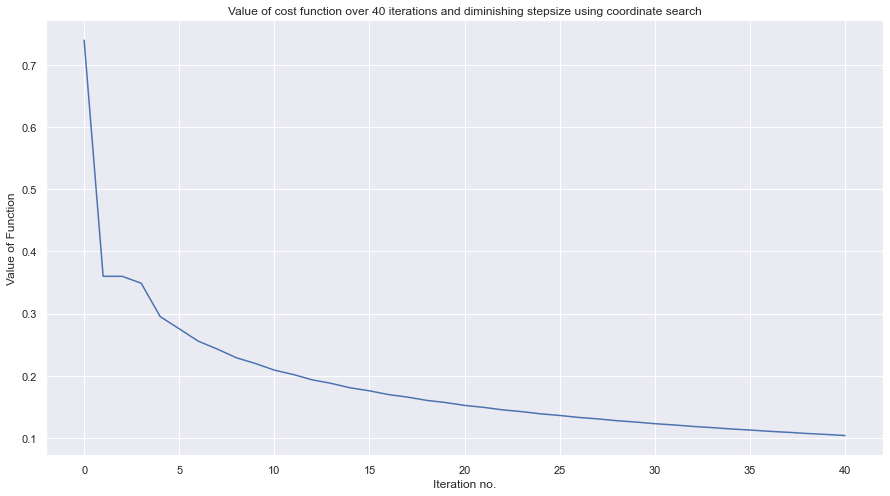

In [143]:
p=sns.lineplot(y=search_cost_history,x=[i for i in range(max_its+1)])
_=p.set(title="Value of cost function over 40 iterations and diminishing stepsize using coordinate search",
        ylabel="Value of Function",xlabel="Iteration no.",xticks=range(0,max_its+1,5))

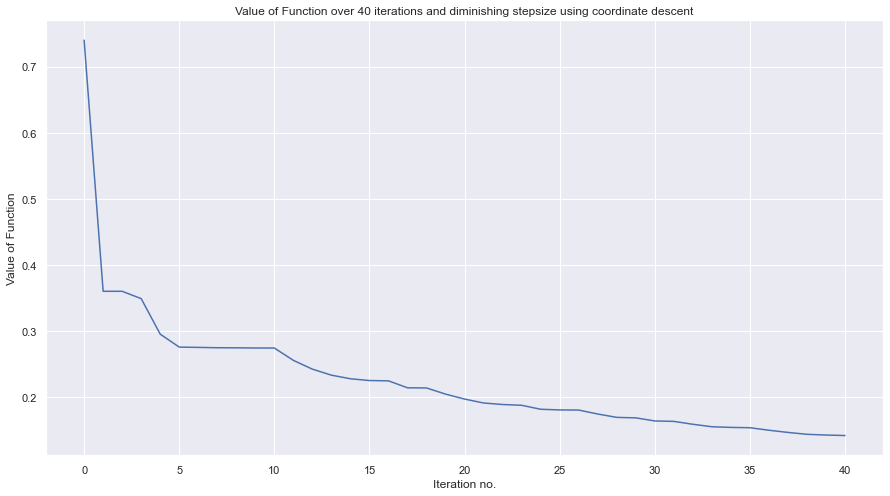

In [144]:
p=sns.lineplot(y=descent_cost_history,x=[i for i in range(max_its+1)])
_=p.set(title="Value of Function over 40 iterations and diminishing stepsize using coordinate descent",
        ylabel="Value of Function",xlabel="Iteration no.",xticks=range(0,max_its+1,5))

While the descent function might computationally be more efficient, it does not reach as low as a final value as the search function despite undergoing the same number of iterations. However, at higher dimensions, the decreased runtime afforded by a coordinate descent makes it more desirable to use than a coordinate search.